# New Environments Demo

This notebook demonstrates the various environment types available for reinforcement learning:

1. **Corridor** - Simple straight corridor navigation
2. **Maze** - Navigate around randomly placed obstacles  
3. **Rooms** - Multi-room navigation with doorways
4. **GridWorld** - Open grid for free movement

All environments use the same agent interface and support GPU-accelerated PyTorch agents!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src import Corridor, Maze, Rooms, GridWorld
from src.agent import QLearningAgent, SARSAAgent
from src.training import train_td_learning
from src.visualization import plot_training_results
from src.utils import SYMBOLS_TO_VALUES

Using device: mps


## 1. Environment Visualization

Let's create and visualize each environment type:

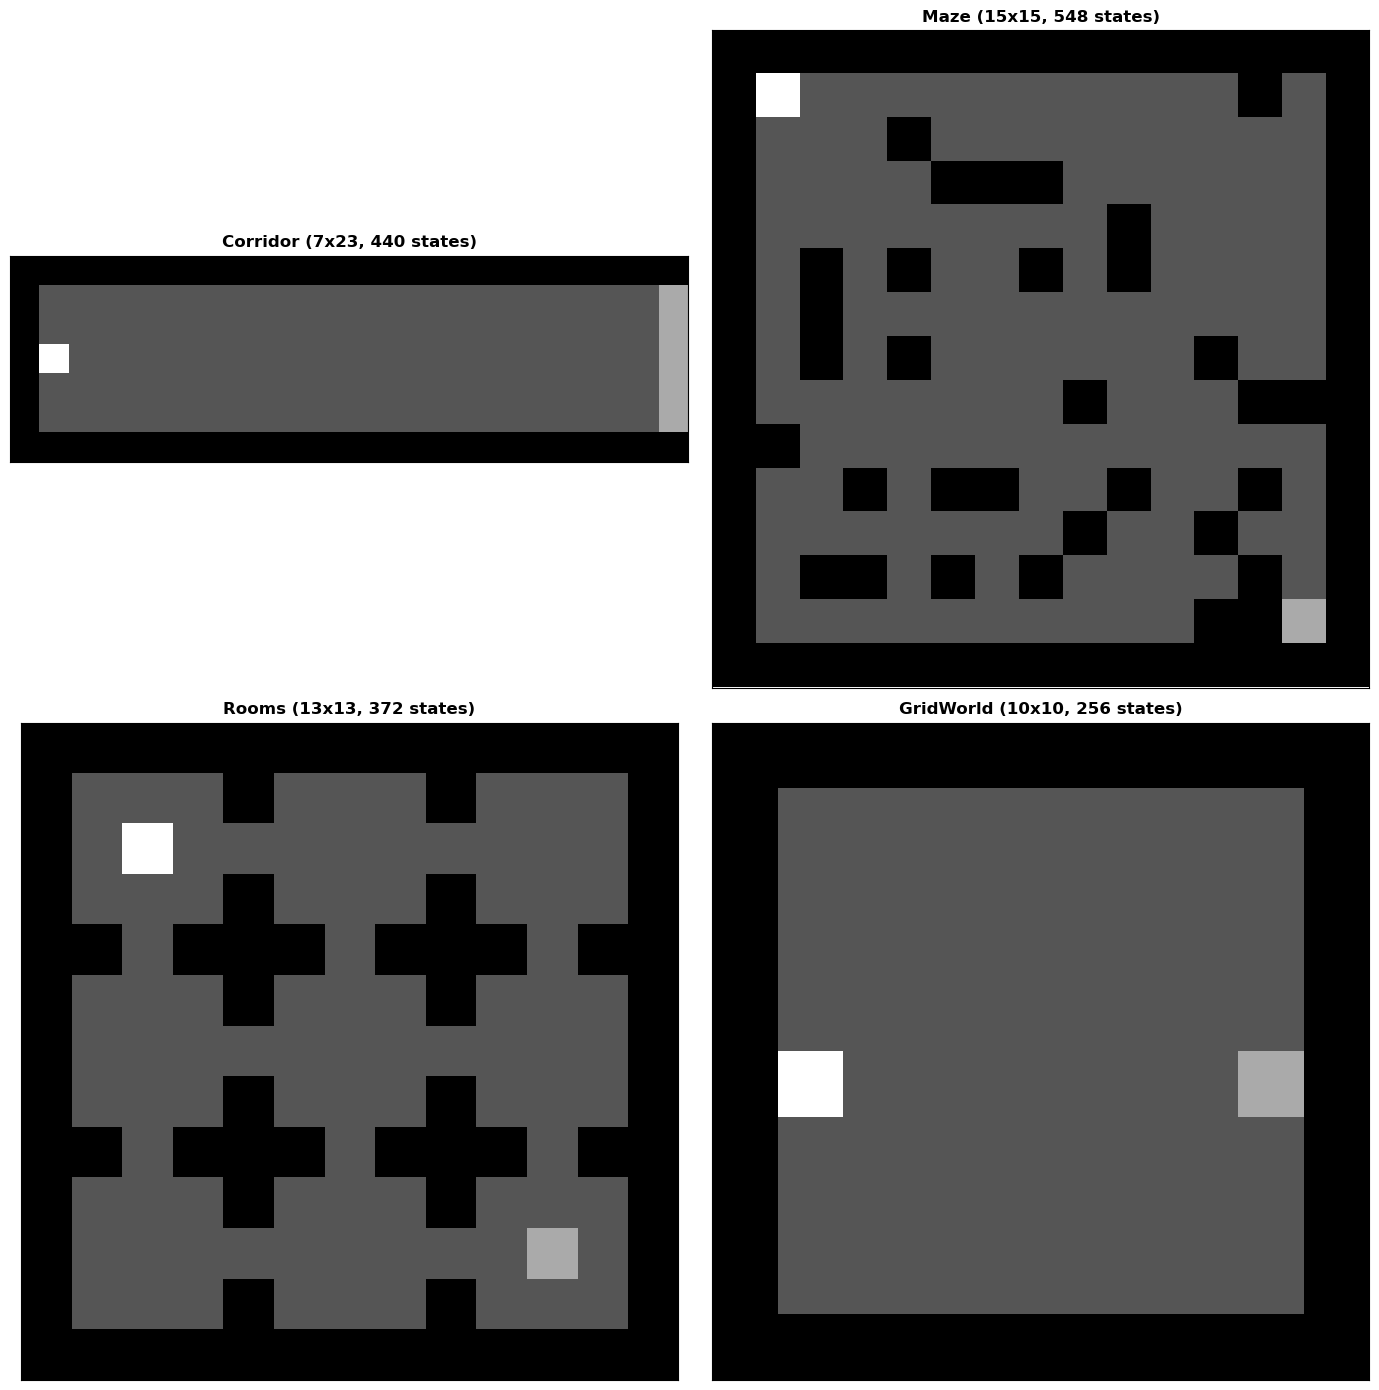

Corridor: 7x23, 440 states
Maze: 15x15, 548 states
Rooms: 13x13, 372 states
GridWorld: 10x10, 256 states


In [2]:
# Create all environment types
environments = {
    "Corridor": Corridor(length=20, width=5),
    "Maze": Maze(size=15, obstacle_density=0.2, seed=42),
    "Rooms": Rooms(n_rooms=9, room_size=3),
    "GridWorld": GridWorld(size=10),
}

# Visualize all environments
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

for idx, (name, env) in enumerate(environments.items()):
    ax = axes[idx]
    res = np.vectorize(SYMBOLS_TO_VALUES.get)(env.corridor)

    ax.imshow(res, cmap="gray", interpolation="nearest")
    ax.set_title(
        f"{name} ({env.width}x{env.length}, {len(env.allowed_actions)} states)",
        fontsize=12,
        fontweight="bold",
    )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)

plt.tight_layout()
plt.show()

# Print environment details
for name, env in environments.items():
    print(f"{name}: {env.width}x{env.length}, {len(env.allowed_actions)} states")

## 2. Training on Corridor Environment

Training on Corridor (7x33)...


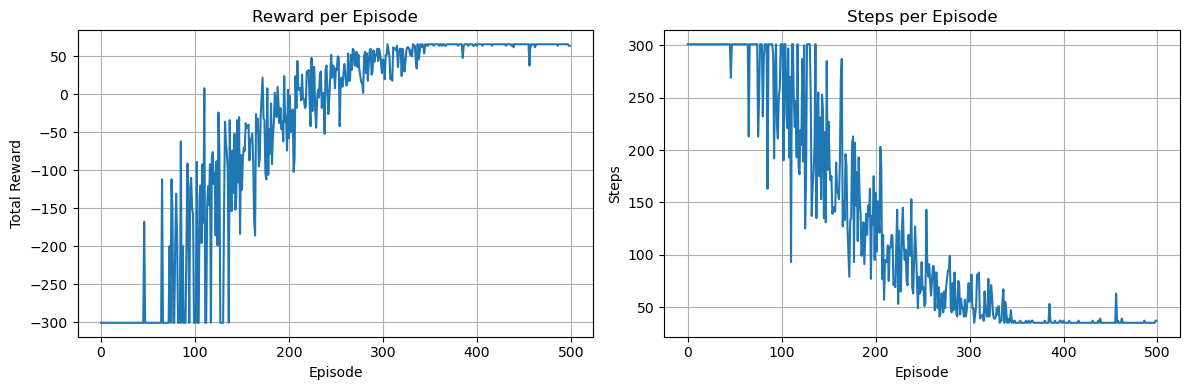

In [3]:
corridor = Corridor(length=30, width=5)
agent = QLearningAgent(corridor, gamma=0.9, alpha=0.5, epsilon=0.5)

print(f"Training on Corridor ({corridor.width}x{corridor.length})...")
steps, rewards = train_td_learning(corridor, agent, n_epochs=500, max_steps=300)

plot_training_results(rewards, steps)

## 3. Training on Maze Environment

Training on Maze (12x12, 348 states)...


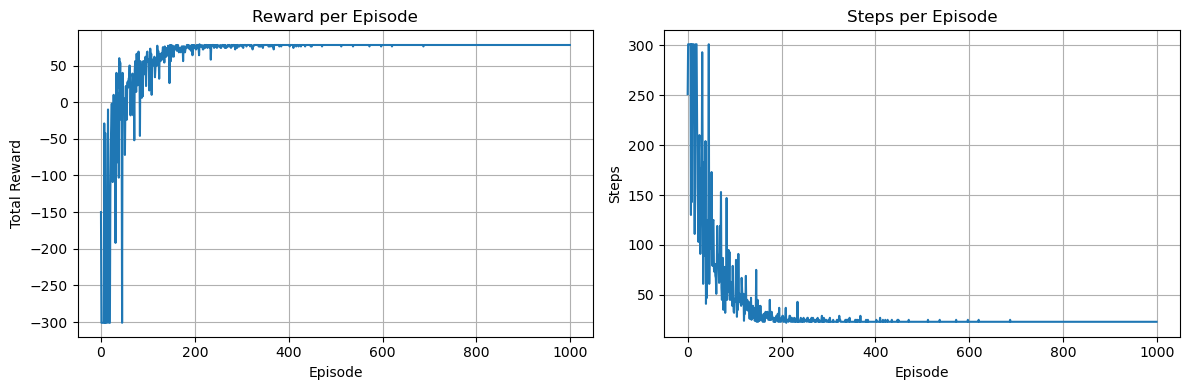

In [4]:
maze = Maze(size=12, obstacle_density=0.15, seed=123)
agent_maze = QLearningAgent(maze, gamma=0.9, alpha=0.5, epsilon=0.5)

print(
    f"Training on Maze ({maze.width}x{maze.length}, {len(maze.allowed_actions)} states)..."
)
steps_maze, rewards_maze = train_td_learning(
    maze, agent_maze, n_epochs=1000, max_steps=300
)

plot_training_results(rewards_maze, steps_maze)

## 4. Training on GridWorld Environment

Training on GridWorld (15x15, 676 states)...


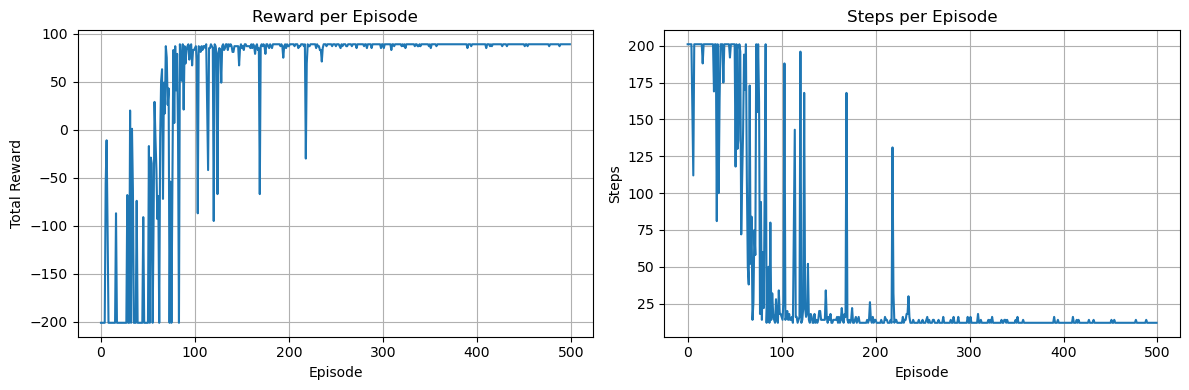

In [5]:
grid = GridWorld(size=15)
agent_grid = QLearningAgent(grid, gamma=0.9, alpha=0.5, epsilon=0.5)

print(
    f"Training on GridWorld ({grid.width}x{grid.length}, {len(grid.allowed_actions)} states)..."
)
steps_grid, rewards_grid = train_td_learning(
    grid, agent_grid, n_epochs=500, max_steps=200
)

plot_training_results(rewards_grid, steps_grid)

## 4. Training on GridWorld Environment

Training on Rooms (28x28, 2352 states)...


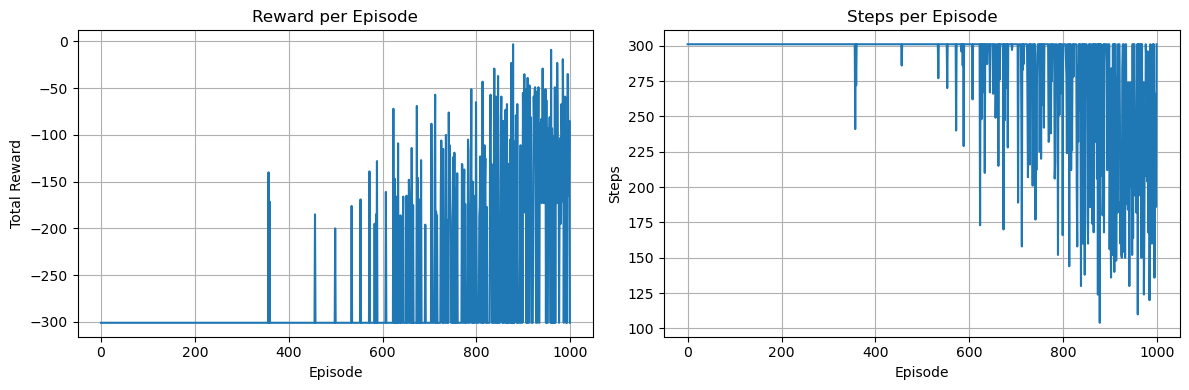

In [6]:
rooms = Rooms(n_rooms=9, room_size=8)
agent_rooms = QLearningAgent(rooms, gamma=0.9, alpha=0.5, epsilon=0.5)

print(
    f"Training on Rooms ({rooms.width}x{rooms.length}, {len(rooms.allowed_actions)} states)..."
)
steps_rooms, rewards_rooms = train_td_learning(
    rooms, agent_rooms, n_epochs=1000, max_steps=300
)

plot_training_results(rewards_rooms, steps_rooms)